In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

digits = load_digits()

features = digits.data
target = digits.target

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.33)

dtr = DecisionTreeClassifier()

dtr.fit(train_features, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

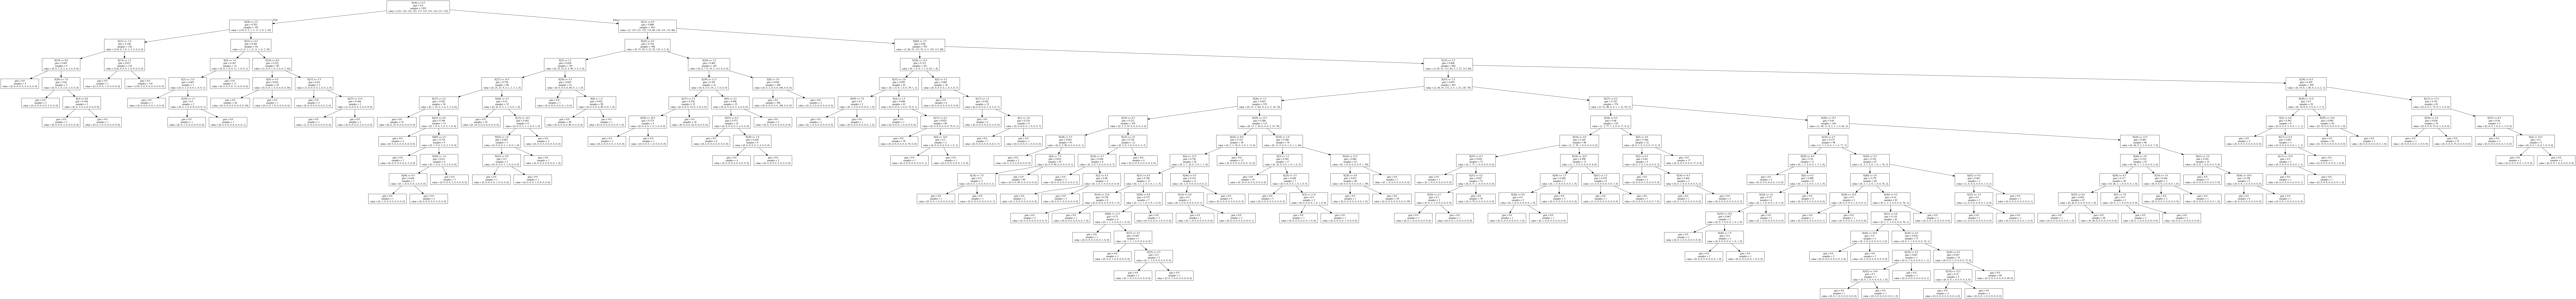

In [8]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dtr)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [9]:
d = dict()
a = dtr.tree_.feature
for item in a:
    try:
        d[item]+=1
    except KeyError:
        d[item]=1
d.pop(-2)
print(d)

{36: 5, 28: 3, 21: 4, 19: 3, 50: 1, 3: 4, 13: 2, 5: 6, 38: 3, 34: 3, 9: 3, 37: 4, 27: 3, 42: 3, 43: 3, 60: 4, 30: 3, 46: 7, 12: 1, 62: 2, 59: 5, 8: 1, 54: 1, 53: 3, 26: 5, 51: 3, 4: 5, 17: 3, 1: 1, 33: 1, 18: 4, 14: 2, 2: 2, 29: 3, 58: 2, 25: 2, 35: 1, 44: 2, 49: 1, 61: 2, 20: 3, 6: 1, 10: 3, 22: 1, 52: 1, 11: 1}


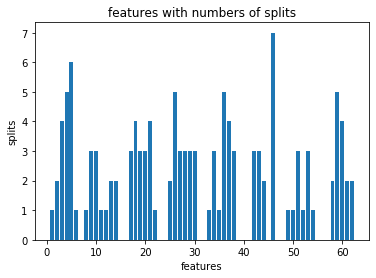

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
x=list(d.keys())
y=list(d.values())
plt.bar(x,y)
plt.xlabel('features')
plt.ylabel('splits')
plt.title('features with numbers of splits')
plt.show()